# Exploratory Data Analysis

## Goal

1. Investigate top-paying roles and skills in the data science industry.
2. Use Python to explore a real-live dataset on job postings.
3. For job-seekers: use these insights to help find the best job opportunities.

## Final Deliverables:
- Create Jupyter Notebookss (showcasing core skills in Python).
- Create a summary page (via [README.md](README.md)) capturing your findings.
- Share this project via GitHub & LinkedIn.

## Questions to Answer

1. What are the most demanded skills for the top 5 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do jobs and skills pay for Data Analysts?
4. What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)





## Exploratory Data Analysis for all Data Roles

### Roles to Explore

In [ ]:
# Imports
import ast
import pandas as pd
import seaborn as sb
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df.info()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) # str -> datetime conversion
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # df.apply() to apply function of ours on all rows, since ast.literal is not                                                                                             
# part of pandas library 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

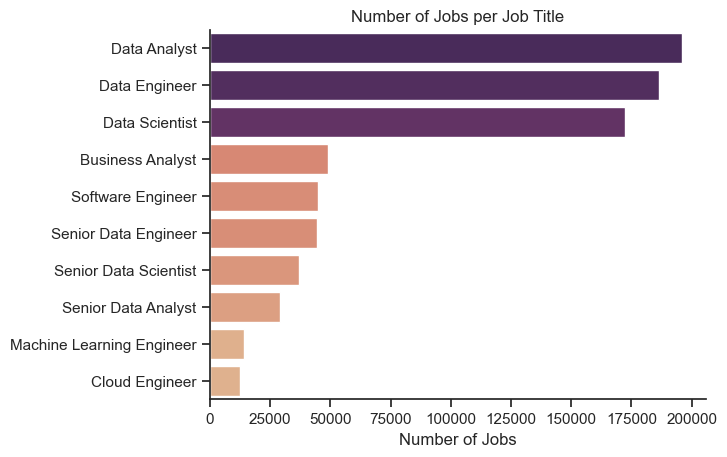

In [13]:
df_plot = df['job_title_short'].value_counts().to_frame()

sb.set_theme(style='ticks')
sb.barplot(data=df_plot, x='count', y='job_title_short', hue='count', palette='flare', legend=False)
sb.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Analyzing number of Jobs per Country

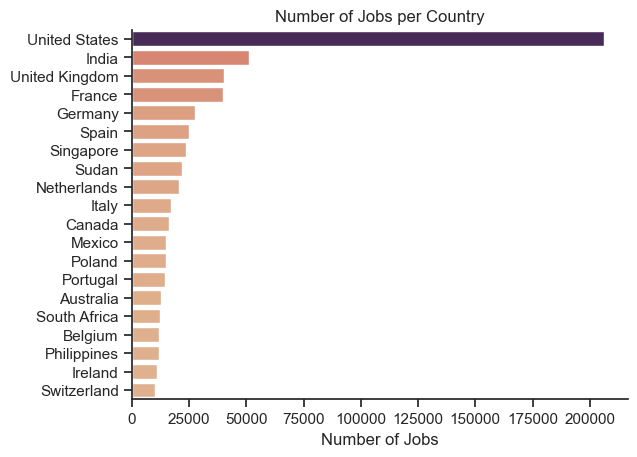

In [18]:
df_plot = df['job_country'].value_counts().to_frame().head(20)

sb.set_theme(style='ticks')
sb.barplot(data=df_plot, x='count', y='job_country', hue='count', palette='flare', legend=False)
sb.despine()
plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Filter for German Data Analyst roles

In [3]:
df_DA_DE = df[(df['job_country'] == 'Germany') & (df['job_title_short'] == 'Data Analyst')]

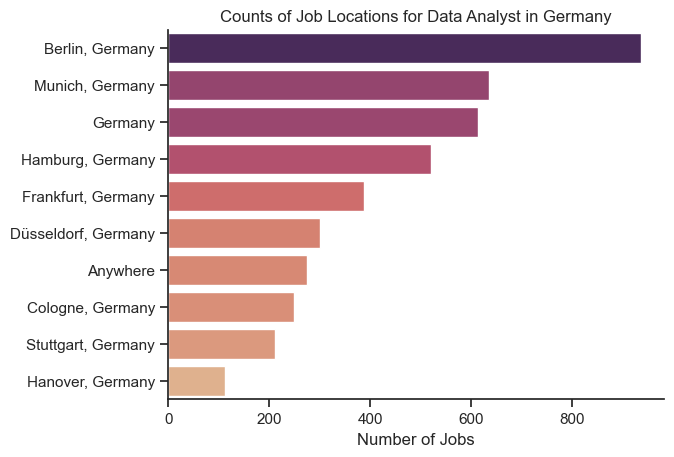

In [51]:
df_plot = df_DA_DE['job_location'].value_counts().head(10).reset_index()
df_plot.columns = ['job_location', 'count']

sb.set_theme(style='ticks')
sb.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='flare', legend=False)
sb.despine()

plt.title('Counts of Job Locations for Data Analyst in Germany')
plt.xlabel('Number of Jobs')
plt.ylabel("")
plt.show()

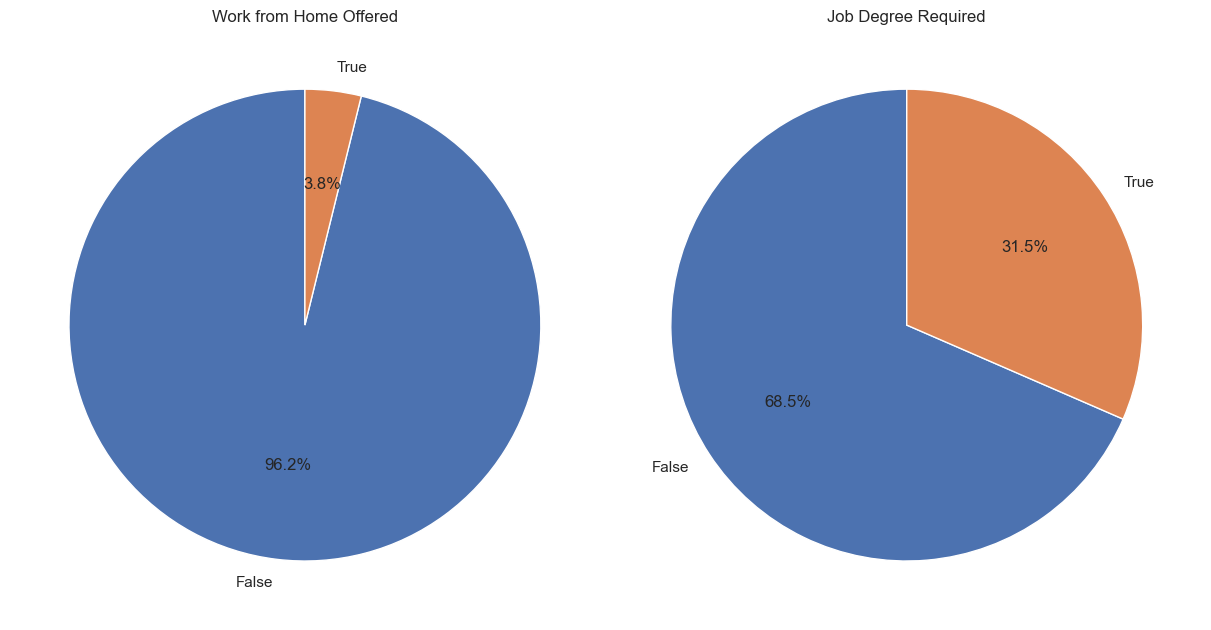

In [37]:

dict_column = {
  'job_work_from_home' : 'Work from Home Offered',
  'job_no_degree_mention' : 'Job Degree Required',
}

fig, ax = plt.subplots(1, 2, figsize=(12, 7), constrained_layout=True)  

for i, (column, title) in enumerate(dict_column.items()):
  #print(i, column, title)
  ax[i].pie(df_DA_DE[column].value_counts(), startangle = 90, autopct='%.1f%%', labels=['False', 'True'])
  ax[i].set_title(title)

plt.show()

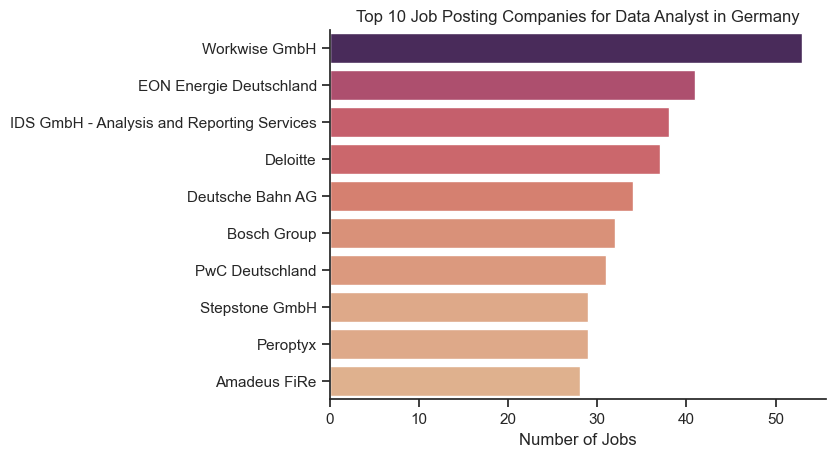

In [56]:
# Create value counts and reset index to get clean columns
df_plot = df_DA_DE['company_name'].value_counts().head(10).reset_index()
df_plot.columns = ['company_name', 'count']  # Rename columns for clarity

sb.set_theme(style='ticks')
sb.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='flare', legend=False)
sb.despine()

plt.title('Top 10 Job Posting Companies for Data Analyst in Germany')
plt.xlabel('Number of Jobs')
plt.ylabel("")
plt.show()

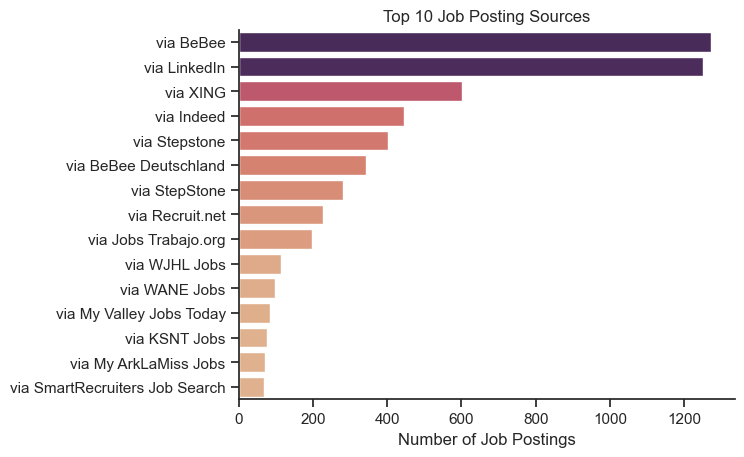

In [54]:
# Create a proper DataFrame with named column
df_plot = df_DA_DE['job_via'].value_counts().head(15).reset_index()
df_plot.columns = ['job_via', 'count']

# Plot
sb.set_theme(style='ticks')
sb.barplot(data=df_plot, x='count', y='job_via', hue='count', palette='flare', legend=False)
sb.despine()

plt.title('Top 10 Job Posting Sources')
plt.xlabel('Number of Job Postings')
plt.ylabel('')
plt.show()

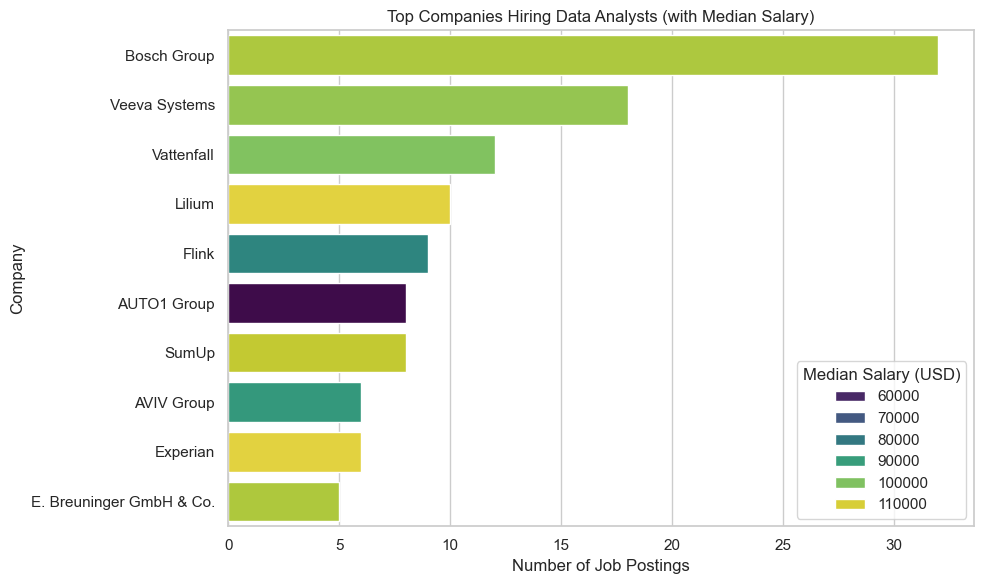

In [72]:
df_company_salary = df_DA_DE.groupby('company_name').agg(
    count=('company_name', 'size'),
    median_salary=('salary_year_avg', 'median')
).dropna(subset=['median_salary'])  # drop if no salary info

df_company_salary = df_company_salary.sort_values(by='count', ascending=False).head(10)
df_company_salary = df_company_salary.reset_index()

sb.set_theme(style='whitegrid')
# barplot where x = number of jobs, hue = salary, y = company
plt.figure(figsize=(10, 6))
sb.barplot(
    data=df_company_salary,
    x='count',
    y='company_name',
    hue='median_salary',
    palette='viridis',
)

plt.title('Top Companies Hiring Data Analysts (with Median Salary)')
plt.xlabel('Number of Job Postings')
plt.ylabel('Company')
plt.legend(title='Median Salary (USD)')
plt.tight_layout()
plt.show()